# Bussiness Questions
1. What are the top 5 expensive and cheap neighbourhoods in Istanbul?
2. What are the expensive and cheap neighbourhoods of Istanbul for different room types?
3. What are the average location review scores neighbourhoods of Istanbul?

In [4]:
#Import necessary packages
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [5]:
df_list = pd.read_csv("./listings.csv")
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,20815,https://www.airbnb.com/rooms/20815,20210226174157,2021-03-01,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill.<br />...,"The lovely neighborhood, Arnavutkoy, is locate...",https://a0.muscache.com/pictures/94805791/481d...,78838,https://www.airbnb.com/users/show/78838,...,10.0,10.0,9.0,NaN,f,2,1,1,0,0.31
1,27271,https://www.airbnb.com/rooms/27271,20210226174157,2021-02-27,Lovely apartment in perfect location,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,https://www.airbnb.com/users/show/117026,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.03
2,28318,https://www.airbnb.com/rooms/28318,20210226174157,2021-03-01,Cosy home overlooking Bosphorus,<b>The space</b><br />Easy access to both brid...,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,https://www.airbnb.com/users/show/121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,29241,https://www.airbnb.com/rooms/29241,20210226174157,2021-03-01,"↪ Istanbul, Your second house",<b>The space</b><br />There are many interesti...,NaN,https://a0.muscache.com/pictures/12385994/b9ba...,125742,https://www.airbnb.com/users/show/125742,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,30697,https://www.airbnb.com/rooms/30697,20210226174157,2021-02-28,nice home in popular area,<b>The space</b><br />I can ensure you that th...,NaN,https://a0.muscache.com/pictures/6392807/b6f01...,132137,https://www.airbnb.com/users/show/132137,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01


In [6]:
print(list(df_list.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [8]:
# Convert price to float
df_list.price = df_list.price.apply(lambda x: float(x[1:].replace(",","")))
df_list.groupby("neighbourhood_cleansed").mean()["price"]

neighbourhood_cleansed
Adalar            787.087179
Arnavutkoy        595.910112
Atasehir          318.365239
Avcilar           330.630350
Bagcilar          419.238095
Bahcelievler      269.160173
Bakirkoy          427.023891
Basaksehir        643.914894
Bayrampasa        242.540541
Besiktas          464.711397
Beykoz           1537.919643
Beylikduzu        782.896552
Beyoglu           432.050644
Buyukcekmece      963.389381
Catalca          1204.238095
Cekmekoy          436.183333
Esenler           184.528302
Esenyurt          312.945833
Eyup              443.299145
Fatih             805.688815
Gaziosmanpasa     572.855422
Gungoren          484.123288
Kadikoy           284.397788
Kagithane         303.199396
Kartal            593.926471
Kucukcekmece     1232.123711
Maltepe           295.093264
Pendik            649.218884
Sancaktepe        176.547170
Sariyer          1288.379630
Sile              718.028249
Silivri          1677.222222
Sisli             689.050539
Sultanbeyli       23

In [9]:
df_list["adjusted_price"] = df_list["price"]/df_list["accommodates"]
df_list[["adjusted_price","price", "accommodates"]]

,adjusted_price,price,accommodates
0,296.333333,889.0,3
1,134.500000,269.0,2
2,464.000000,928.0,2
3,123.666667,371.0,3
4,448.000000,896.0,2
...,...,...,...
24514,39.500000,158.0,4
24515,82.000000,82.0,1
24516,671.833333,4031.0,6
24517,42.250000,169.0,4


<AxesSubplot:title={'center':'Istanbul Districts'}>

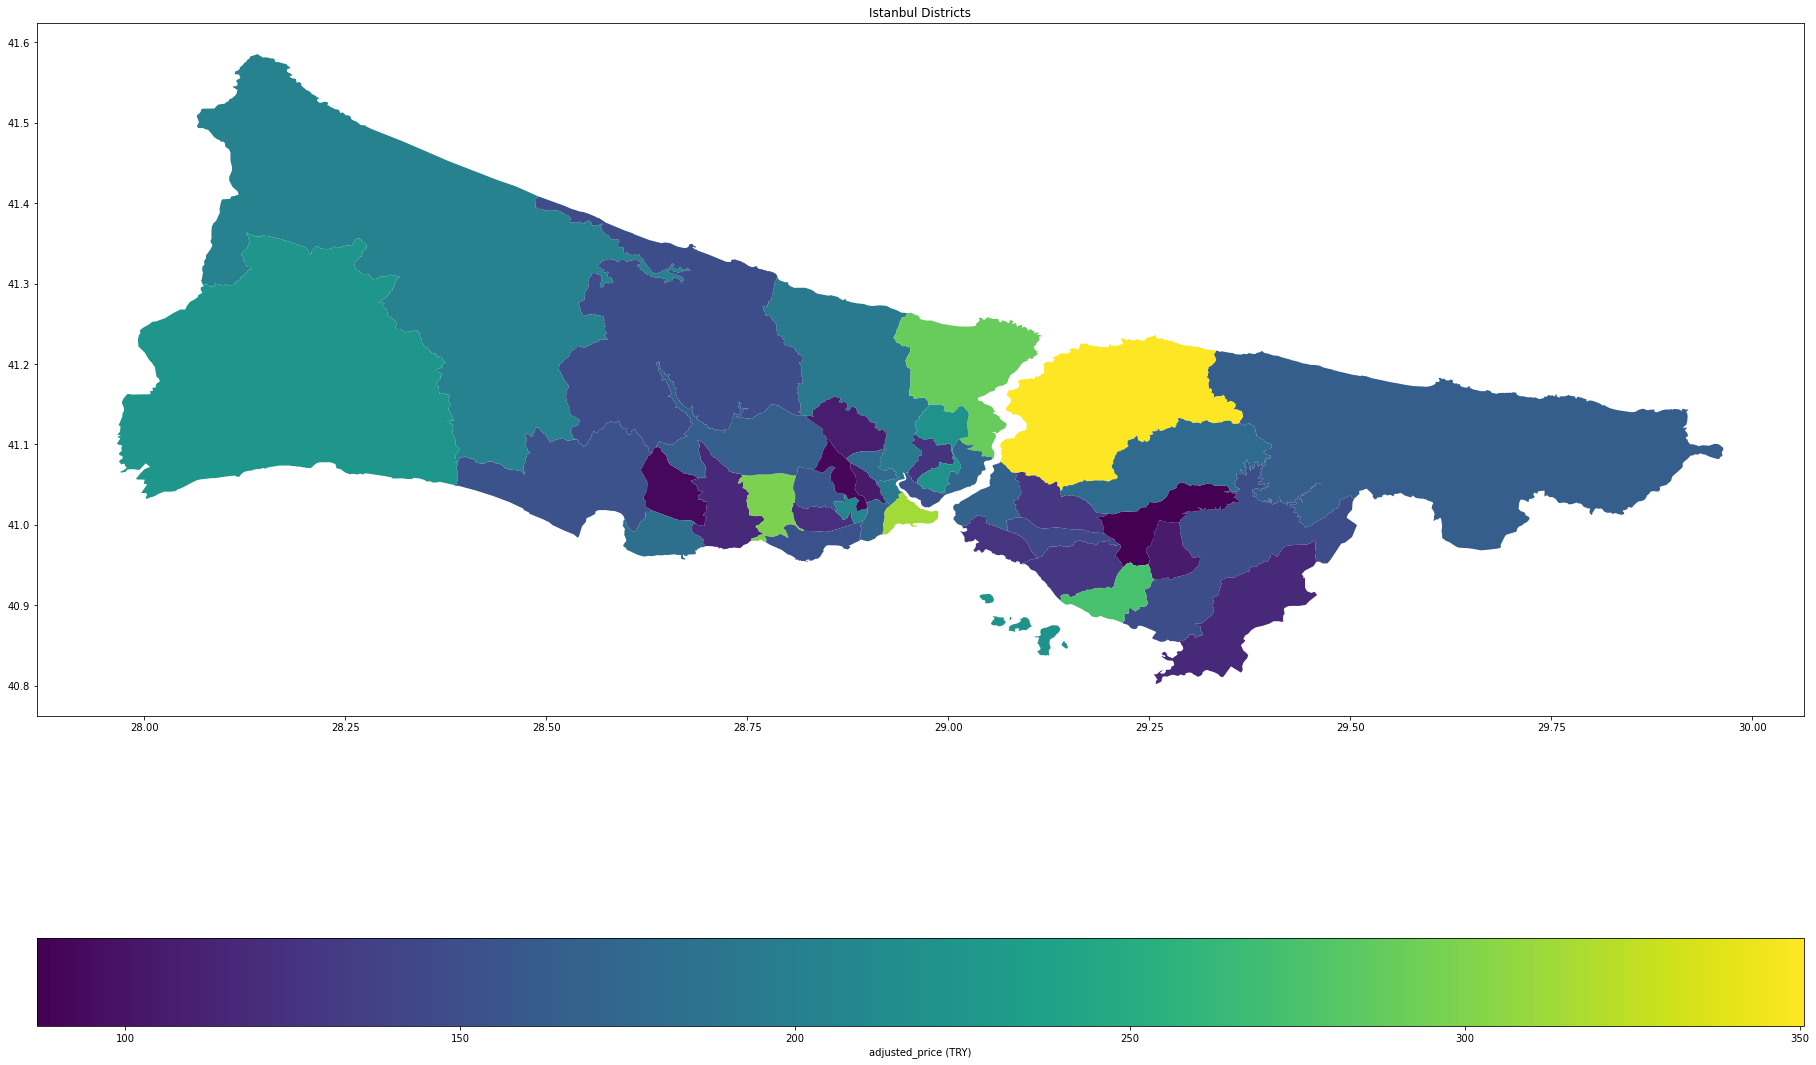

In [10]:
gdf = gpd.read_file("./neighbourhoods.geojson")

adjusted_price_df = df_list.groupby("neighbourhood_cleansed").mean()[["adjusted_price"]].sort_values(by="adjusted_price",ascending=False)
#gdf.plot()
for i, row in gdf.iterrows():
    gdf.loc[i,"adjusted_price"] = adjusted_price_df.loc[row["neighbourhood"],"adjusted_price"]

px = 1/plt.rcParams['figure.dpi'] 
fig, ax = plt.subplots(figsize=(2280*px, 1960*px))

plt.title("Istanbul Districts")
gdf.plot(column="adjusted_price", ax=ax, legend=True,
        legend_kwds={'label': "adjusted_price (TRY)",
                    'orientation':'horizontal'})

In [11]:
df_list["room_type"].value_counts()

Entire home/apt    12429
Private room       10605
Hotel room           802
Shared room          683
Name: room_type, dtype: int64

In [12]:
nulls = df_list.isna().sum()
nulls[nulls == 0]

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
picture_url                                     0
host_id                                         0
host_url                                        0
host_verifications                              0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


In [13]:
df_list.groupby(["neighbourhood_cleansed", "room_type"]).mean()["price"]

neighbourhood_cleansed  room_type      
Adalar                  Entire home/apt    948.379032
                        Hotel room         489.555556
                        Private room       496.950000
                        Shared room        830.000000
Arnavutkoy              Entire home/apt    780.222222
                                              ...    
Uskudar                 Shared room        159.645161
Zeytinburnu             Entire home/apt    690.612903
                        Hotel room         312.000000
                        Private room       511.829787
                        Shared room         83.000000
Name: price, Length: 139, dtype: float64

In [14]:
df_list.groupby("neighbourhood_cleansed").mean()[["adjusted_price","price"]].sort_values(by="adjusted_price",ascending=False).iloc[:5]

,adjusted_price,price
neighbourhood_cleansed,,
Beykoz,350.579929,1537.919643
Fatih,314.134554,805.688815
Kucukcekmece,299.034108,1232.123711
Sariyer,289.669663,1288.379630
Kartal,273.899005,593.926471


In [15]:
df_list.groupby("neighbourhood_cleansed").mean()[["adjusted_price","price"]].sort_values(by="adjusted_price",ascending=True).iloc[:5]

,adjusted_price,price
neighbourhood_cleansed,,
Sancaktepe,86.762579,176.547170
Esenler,91.732704,184.528302
Esenyurt,92.913153,312.945833
Bayrampasa,104.928411,242.540541
Sultanbeyli,106.289474,239.526316


In [16]:
room_types = list(set(df_list["room_type"]))  
room_types

['Shared room', 'Entire home/apt', 'Hotel room', 'Private room']

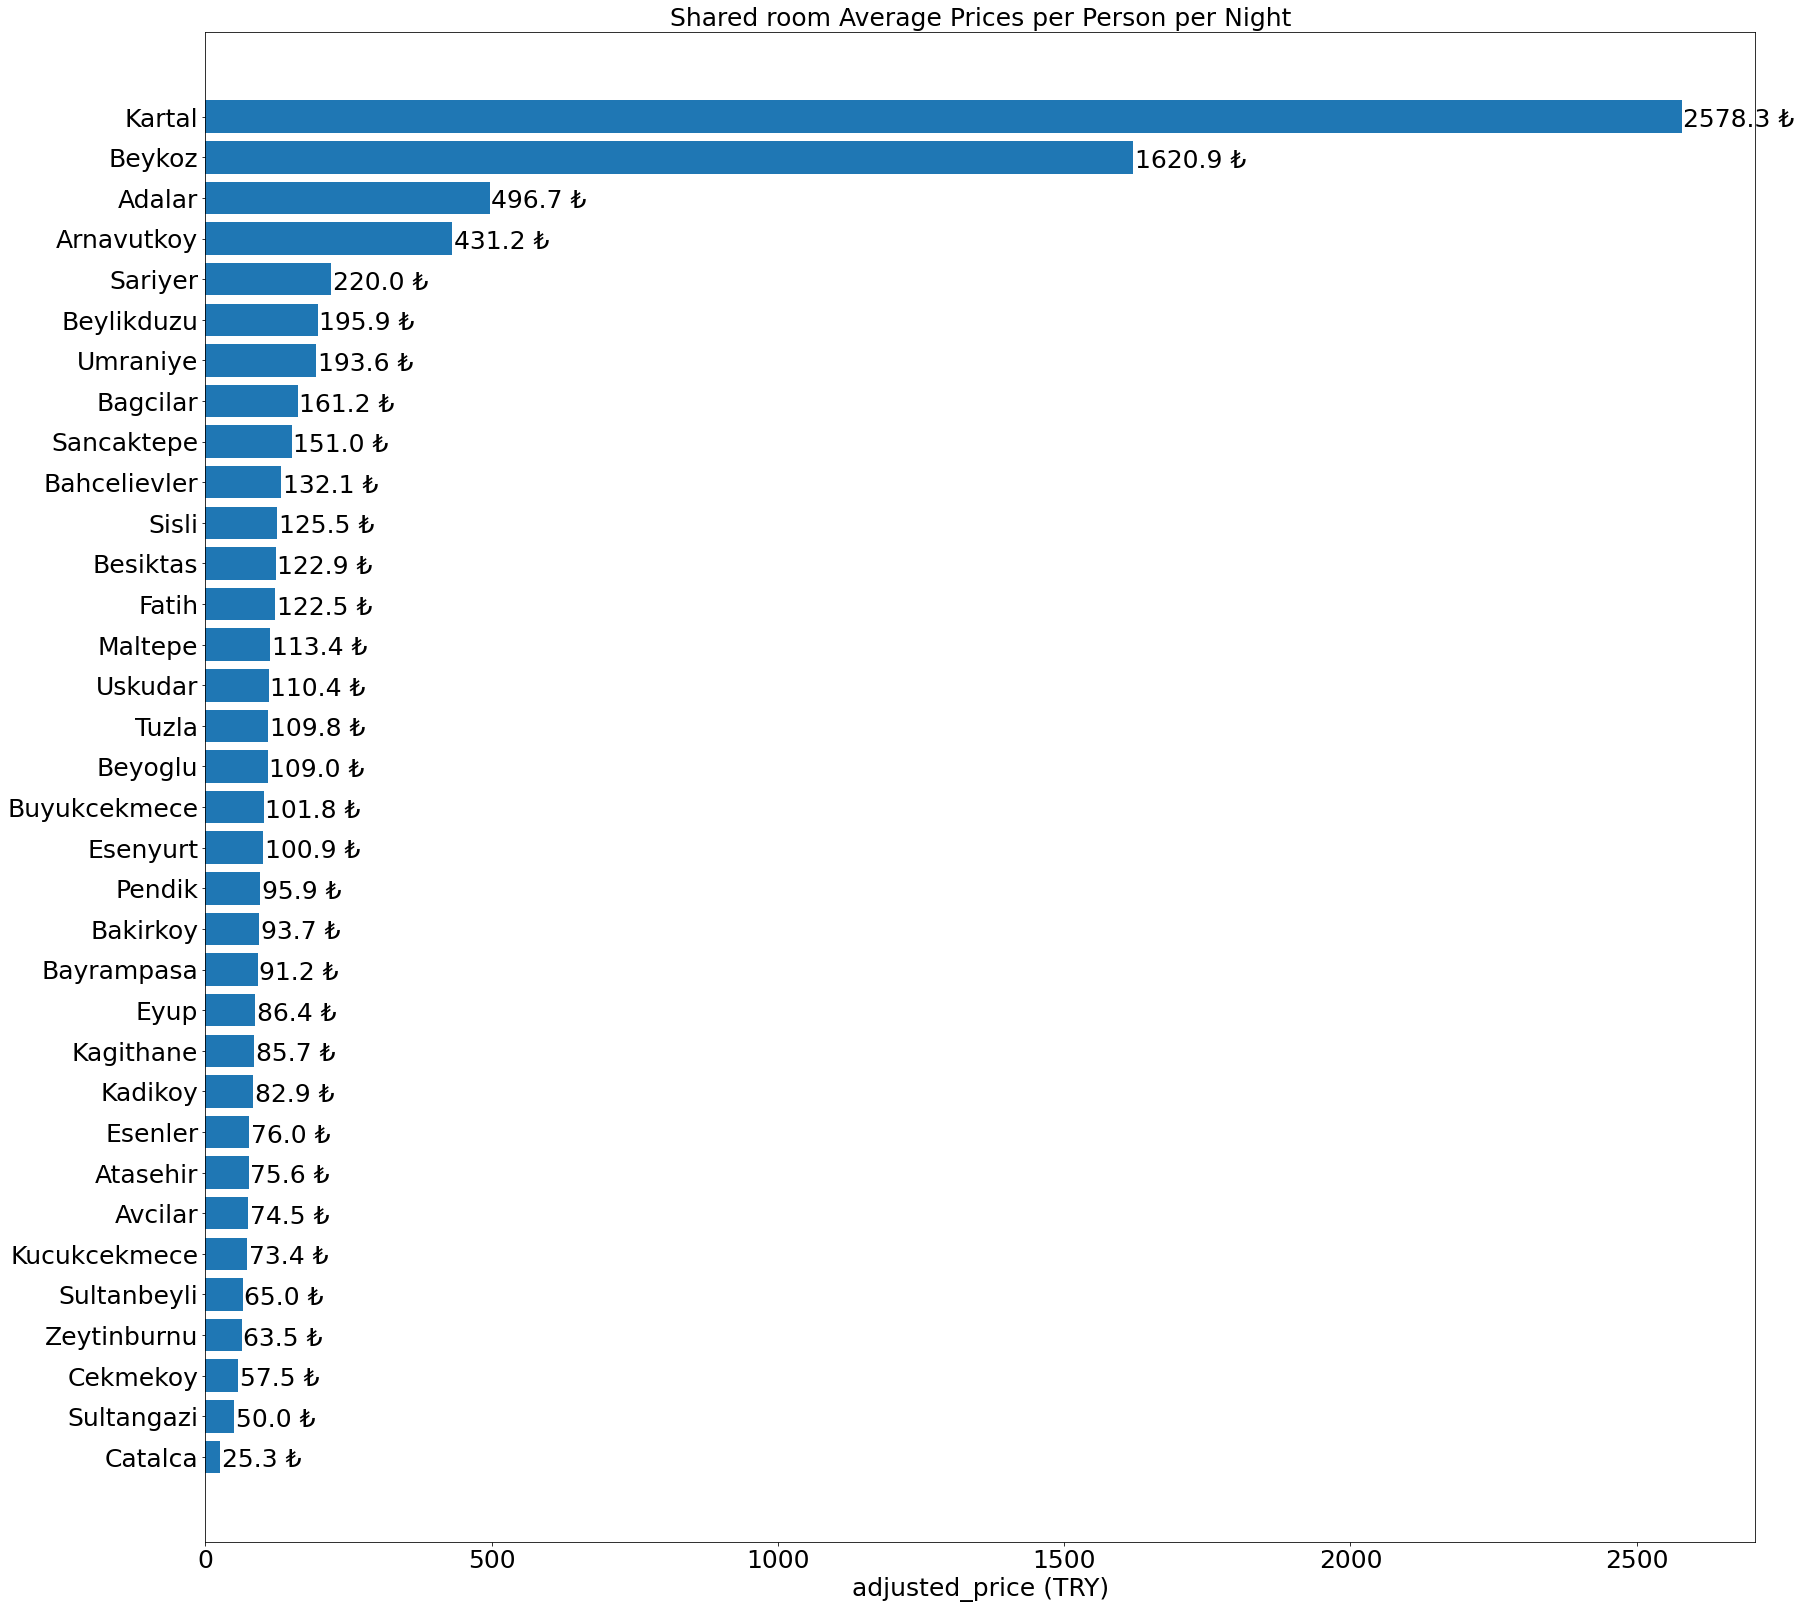

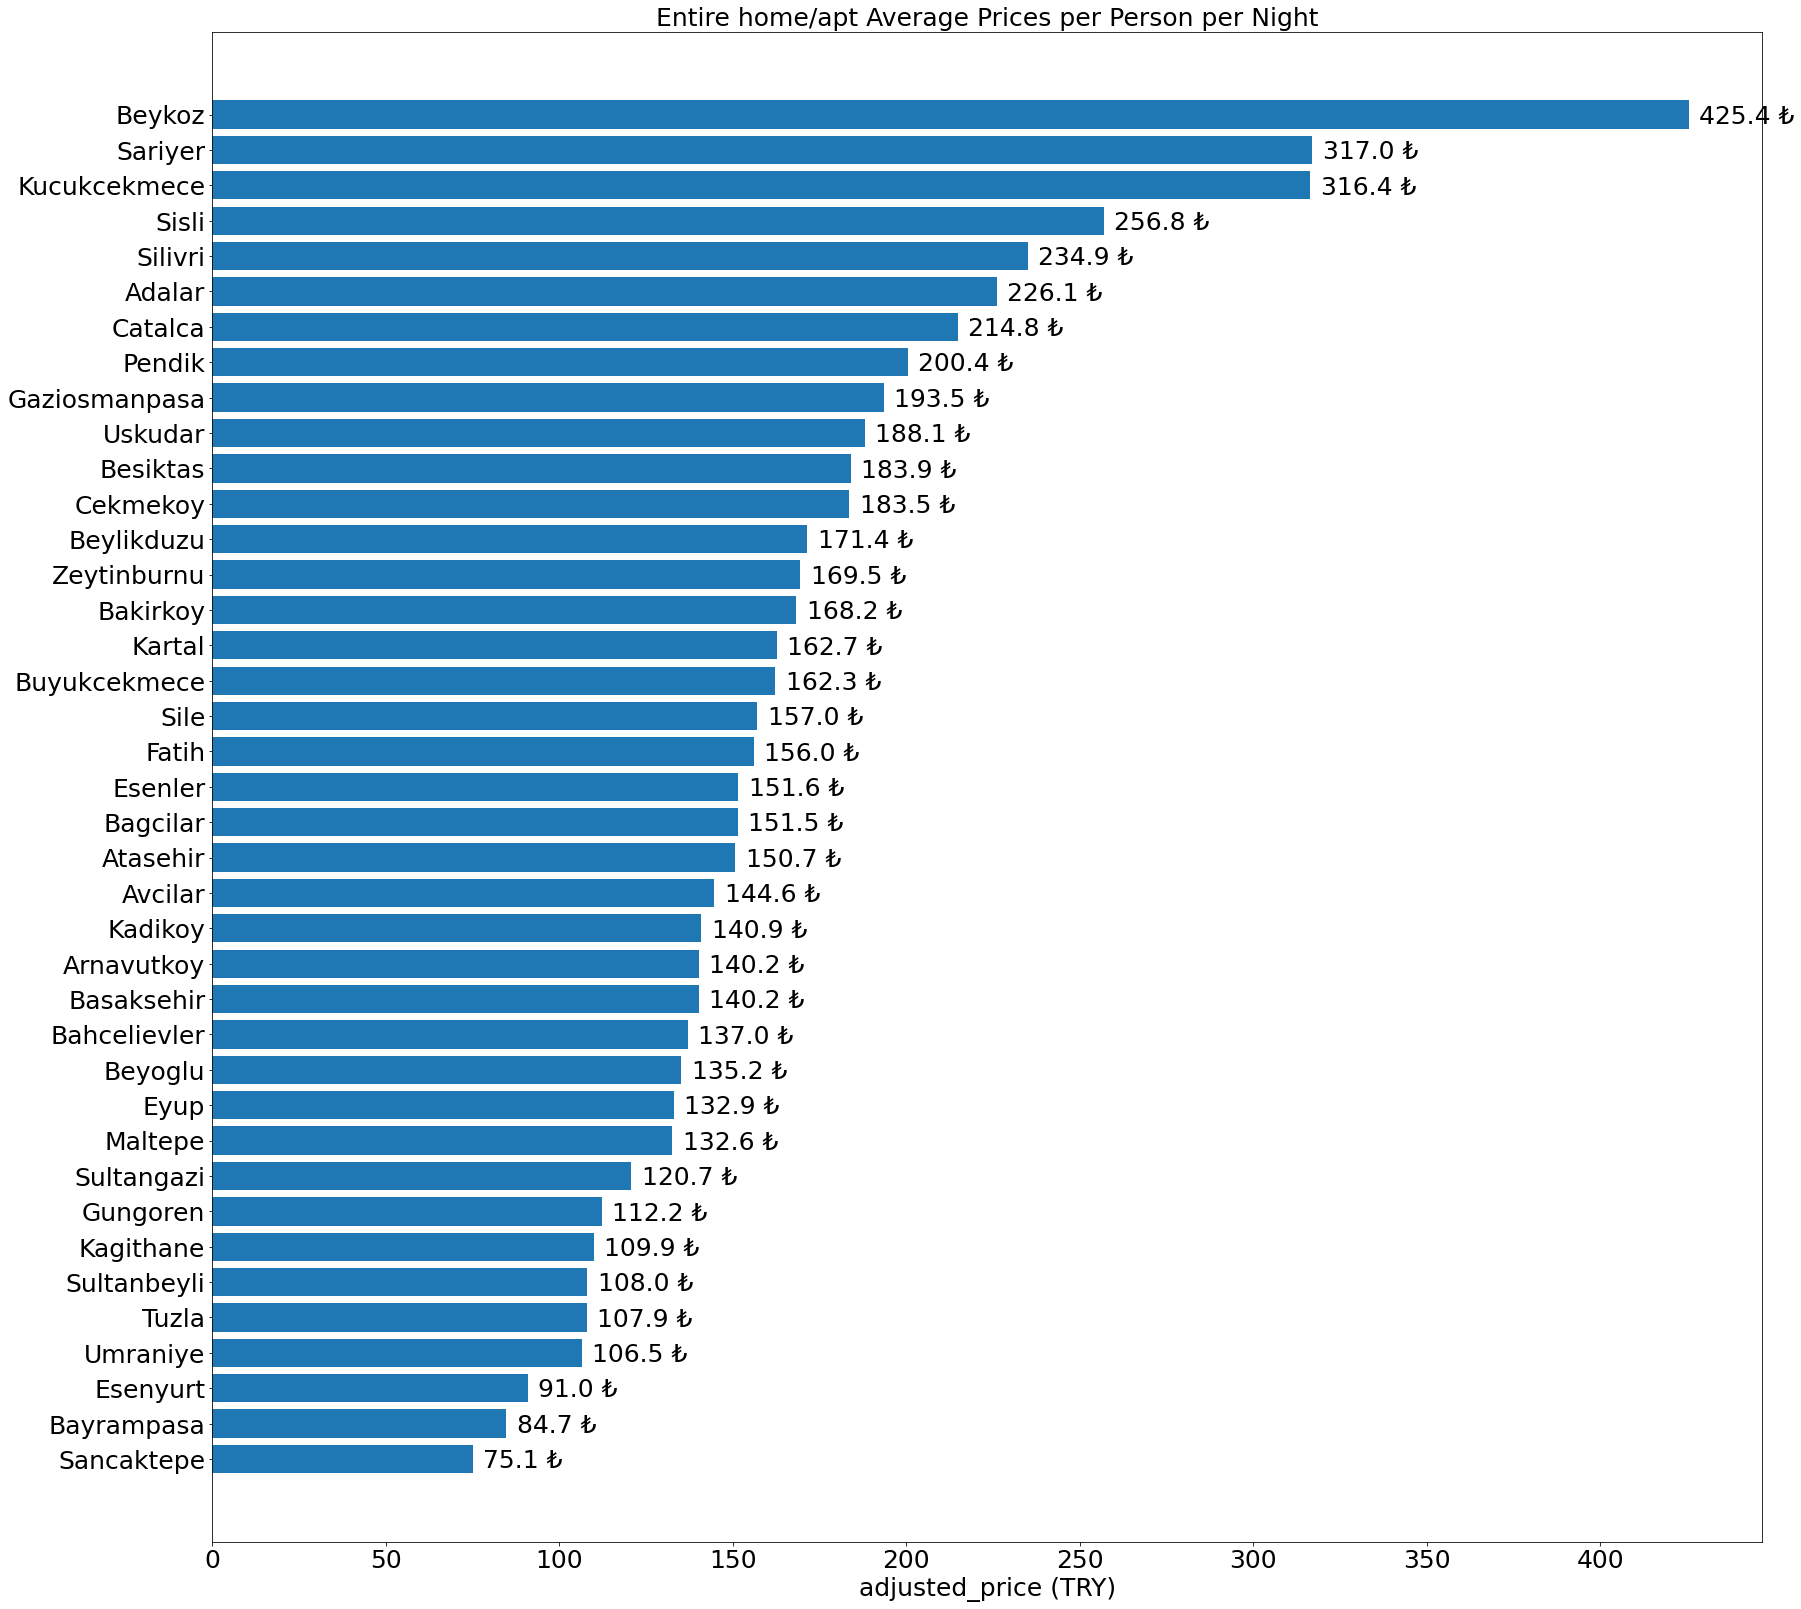

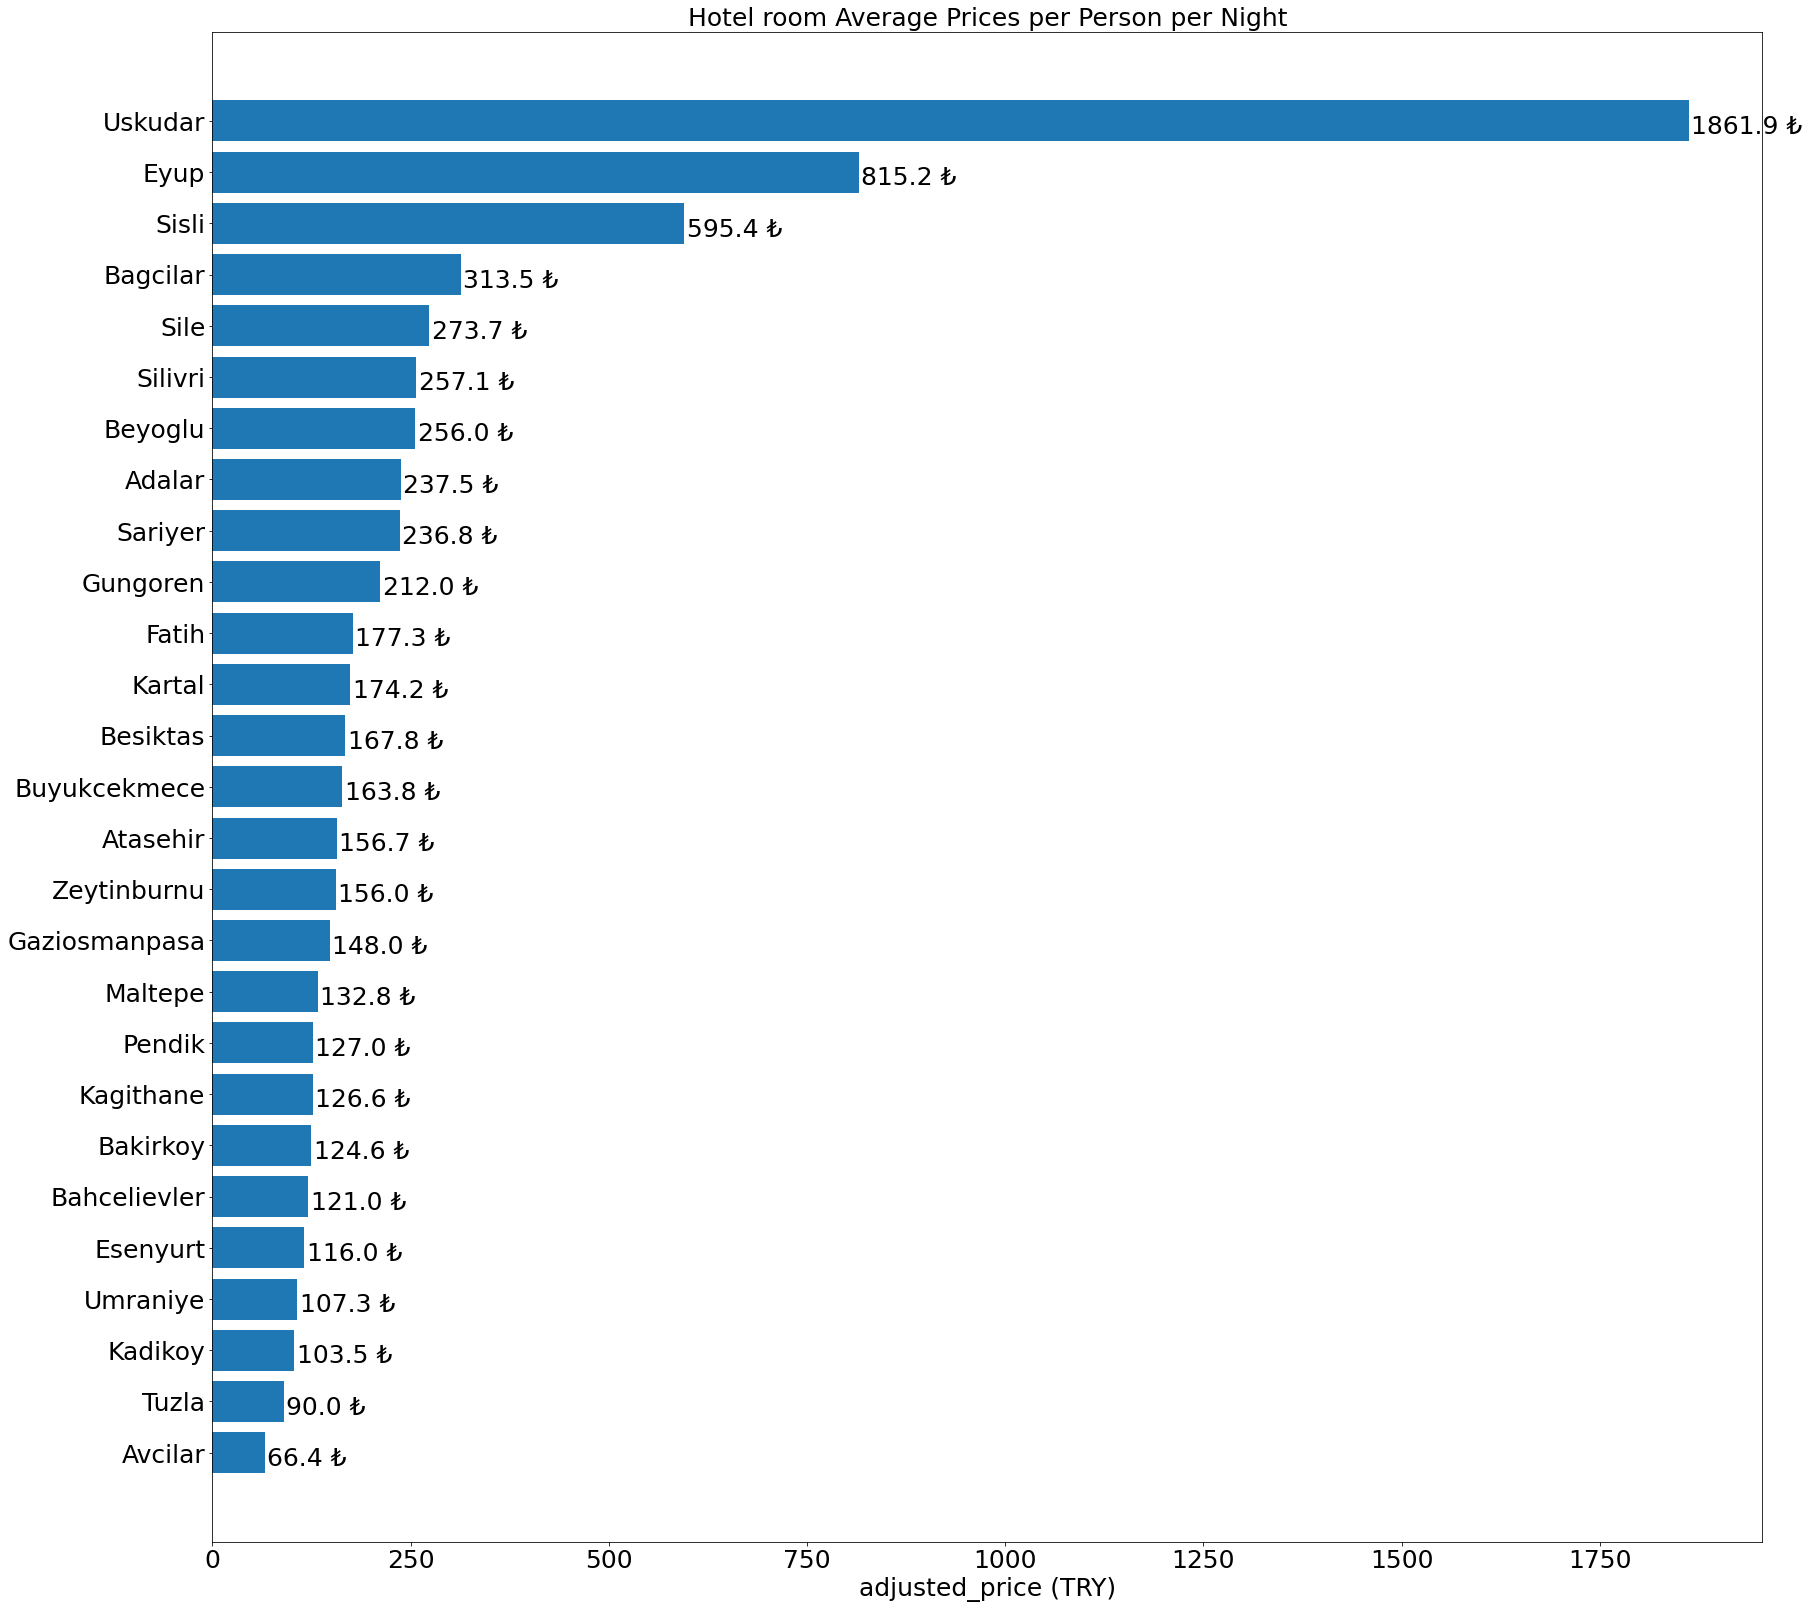

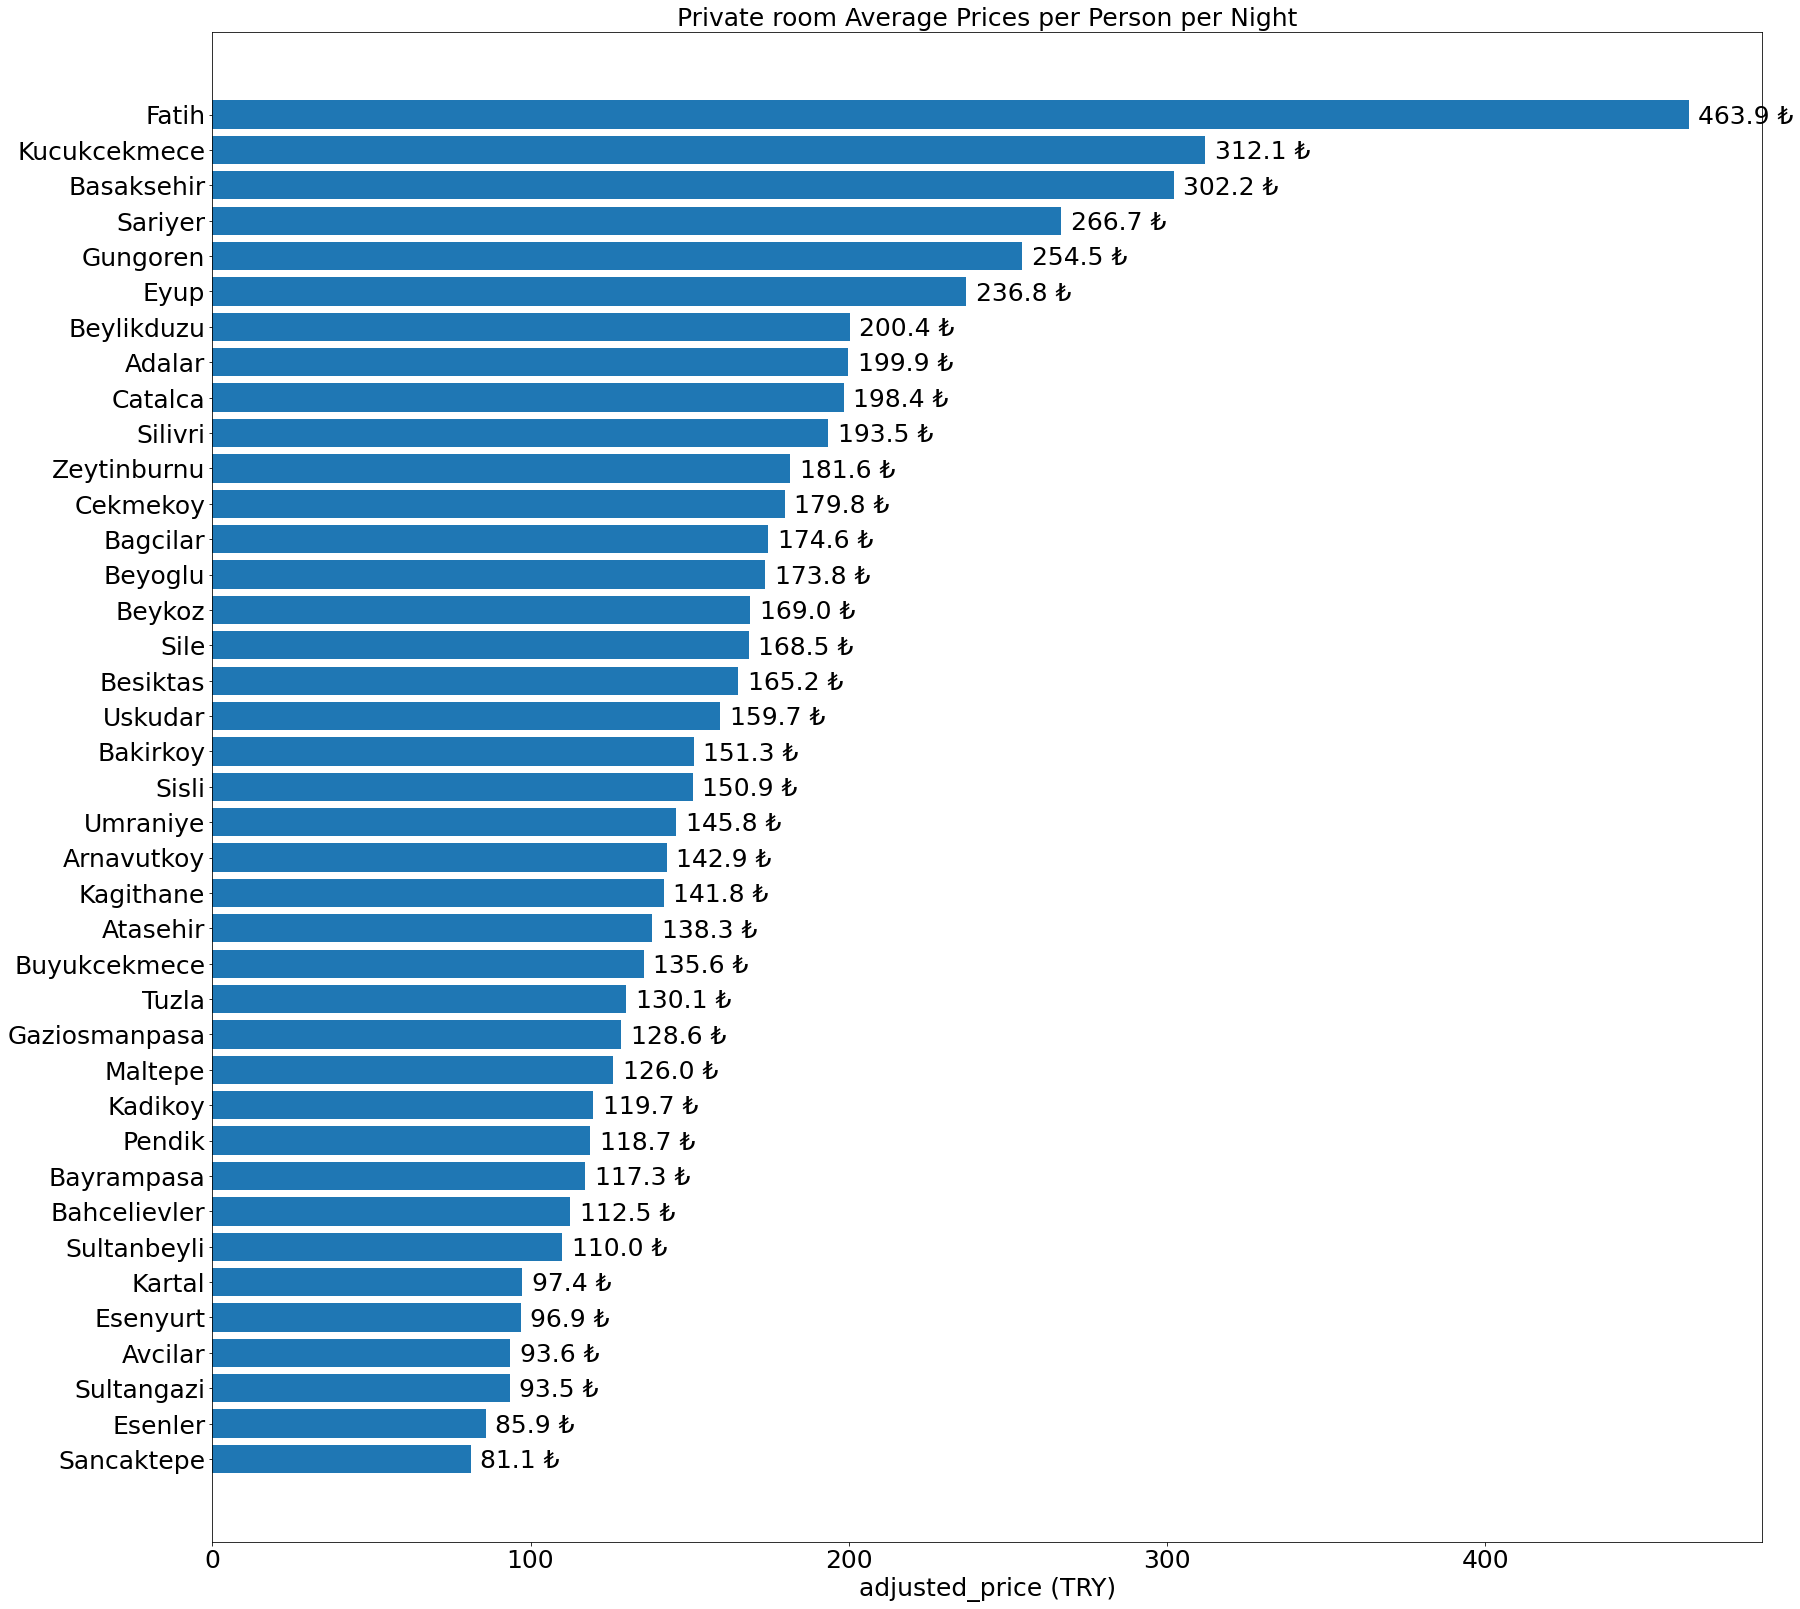

In [17]:
def save_figure(room_type):
    dfs = df_list[df_list["room_type"]==room_type].groupby(["neighbourhood_cleansed", "room_type"]).mean()[["price","adjusted_price"]].sort_values(by=["adjusted_price"])
    districts = [index[0] for index in list(dfs.index)]
    adjusted_prices = list(dfs["adjusted_price"])
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.subplots(figsize=(2000*px, 2000*px))
    plt.title(f"{room_type} Average Prices per Person per Night",fontsize=25)
    plt.xlabel("adjusted_price (TRY)",fontsize=25)
    plt.barh(districts, adjusted_prices)
    room_type = room_type.replace("/","-")
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    for i, v in enumerate(adjusted_prices): 
        plt.text(v + 3, i - .25 , str(round(v,1))+" \u20BA",fontsize=25)
    plt.savefig(f'{room_type}.png')
room_types = list(set(df_list["room_type"])) 
for room_type in room_types:
    save_figure(room_type)


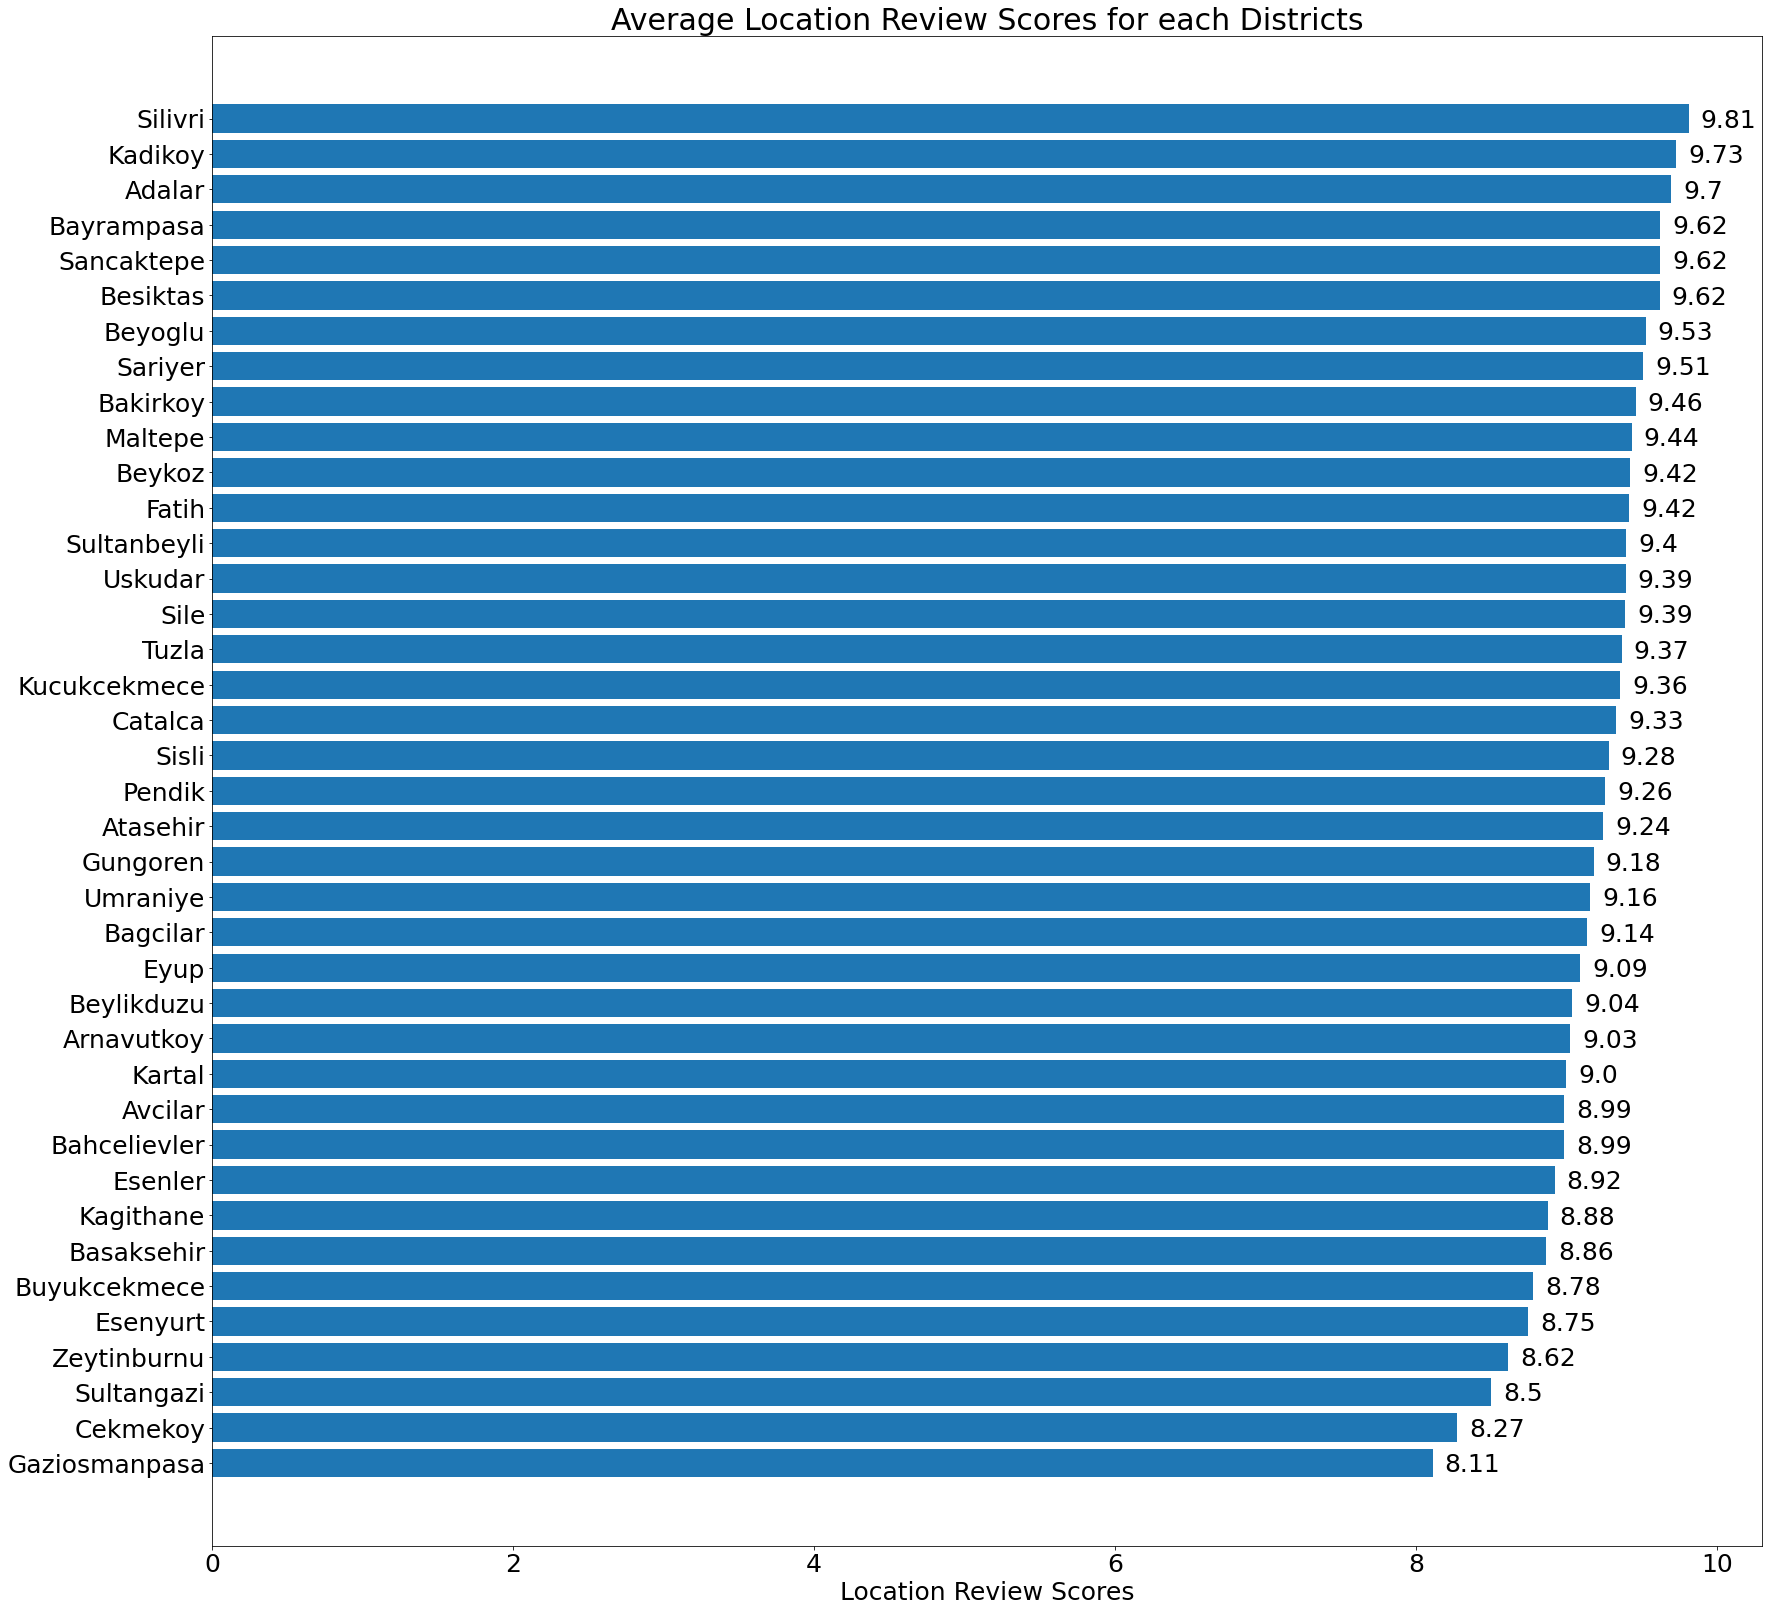

In [18]:
reviews = [ 'review_scores_rating', 'review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
           'review_scores_location', 'review_scores_value']
df_list1 = df_list.dropna(subset=["review_scores_location"])
df_list1 = df_list1.groupby("neighbourhood_cleansed").mean()[reviews].sort_values('review_scores_location')

districts = list(df_list1.index)
review_scores_location = list(df_list1["review_scores_location"])
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.subplots(figsize=(2000*px, 2000*px))
plt.title(f"Average Location Review Scores for each Districts",fontsize=30)
plt.xlabel("Location Review Scores",fontsize=25)
plt.barh(districts, review_scores_location)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
for i, v in enumerate(review_scores_location): 
    plt.text(v+0.08, i - .25 , str(round(v,2)),fontsize=25)
plt.savefig(f'Average Location Review Scores.png')

In [20]:
df_list1 = df_list1.groupby("neighbourhood_cleansed").mean()[reviews].sort_values('review_scores_location')
df_list1

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
neighbourhood_cleansed,,,,,,,
Gaziosmanpasa,84.777778,8.388889,8.388889,8.500000,8.555556,8.111111,8.500000
Cekmekoy,80.818182,8.090909,7.909091,8.909091,8.636364,8.272727,8.636364
Sultangazi,100.000000,9.500000,9.250000,9.250000,9.000000,8.500000,10.000000
Zeytinburnu,84.051282,8.794872,8.692308,9.153846,9.051282,8.615385,8.666667
Esenyurt,84.478469,8.607656,8.253589,8.956938,8.870813,8.746411,8.459330
Buyukcekmece,86.437500,8.437500,8.656250,9.343750,9.093750,8.781250,8.250000
Basaksehir,86.833333,8.895833,8.656250,9.041667,9.187500,8.864583,8.770833
Kagithane,91.164706,9.129412,8.858824,9.405882,9.417647,8.876471,8.958824
Esenler,96.923077,9.692308,9.692308,9.846154,9.923077,8.923077,9.846154
